AIRBNB VISUALIZATION AND ANALYSIS/ Retno Prabaningrum (retnoprabaningrum81@gmail.com)

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2. Load Dataset

In [2]:
data= pd.read_csv('/content/AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [3]:
data.shape

(22059, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review                     

3. Remove the Duplicates Data (if any) and Check the Null Values

In [5]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

4. Check the Data Changes

In [6]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


5. Check the Continous Variables

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.205900e+04,2.205900e+04,22059.000000,22059.000000,22058.000000,22058.000000,22058.000000,18358.000000,22058.000000,22058.000000
mean,8.511062e+06,2.447159e+07,40.729520,-73.956852,151.245852,7.408151,35.785248,0.944976,3.721688,103.508614
std,5.258526e+06,2.707545e+07,0.053118,0.039701,235.534537,23.883845,58.826793,1.297014,12.938362,132.634612
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.996390e+06,3.977023e+06,40.689765,-73.983265,73.000000,2.000000,1.000000,0.100000,1.000000,0.000000
50%,8.520836e+06,1.428111e+07,40.723370,-73.958010,110.000000,3.000000,9.000000,0.360000,1.000000,9.000000
75%,1.324998e+07,3.657868e+07,40.763950,-73.941490,175.000000,5.000000,45.000000,1.310000,2.000000,221.000000
max,1.775024e+07,1.210969e+08,40.908040,-73.000000,10000.000000,1250.000000,629.000000,16.220000,121.000000,365.000000


6. Print Columns Names

In [8]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Get Correlation

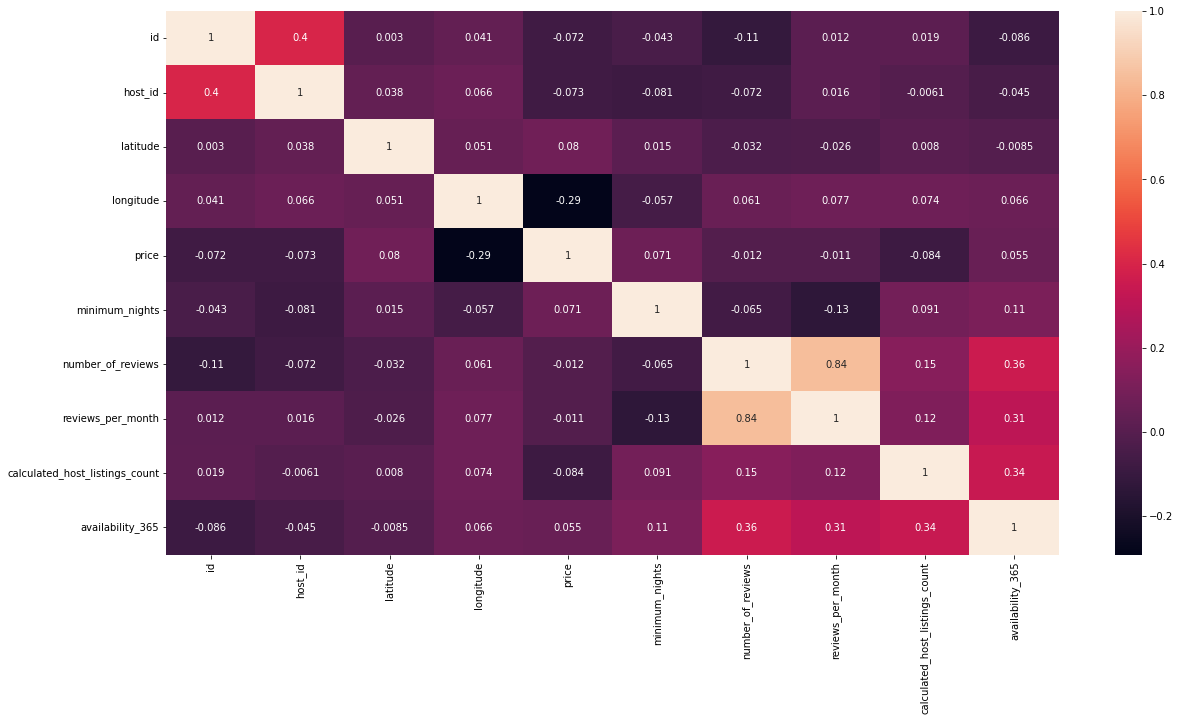

In [9]:
corr = data.corr('kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

7. Data Visualization

In [10]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
print(data.corr)

<bound method DataFrame.corr of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
...         ...                                                ...        ...   
22054  17744351                1 Bd furnished Bayridge Brooklyn NY  119029523   
22055  17746222  Perfect bedroom. Near Subways Columbia CityCol...   16721721   
22056  17748284  Guest BedRm in quaint NYC neighborhood. NEAR T...   25196982   
22057  17749273                      1 br Woodside - close to LGA!  121096858   
22058  17750238          Great room in a spacious Inwood Apartment   13860679

In [12]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

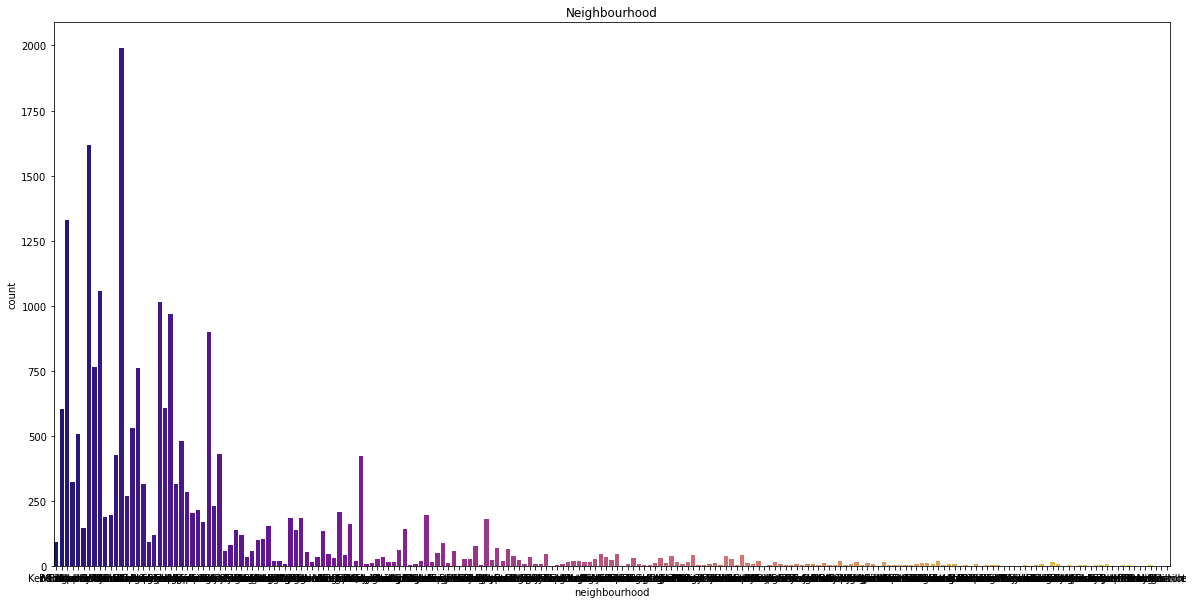

In [14]:
sns.countplot(data['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Neighbourhood')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'price')

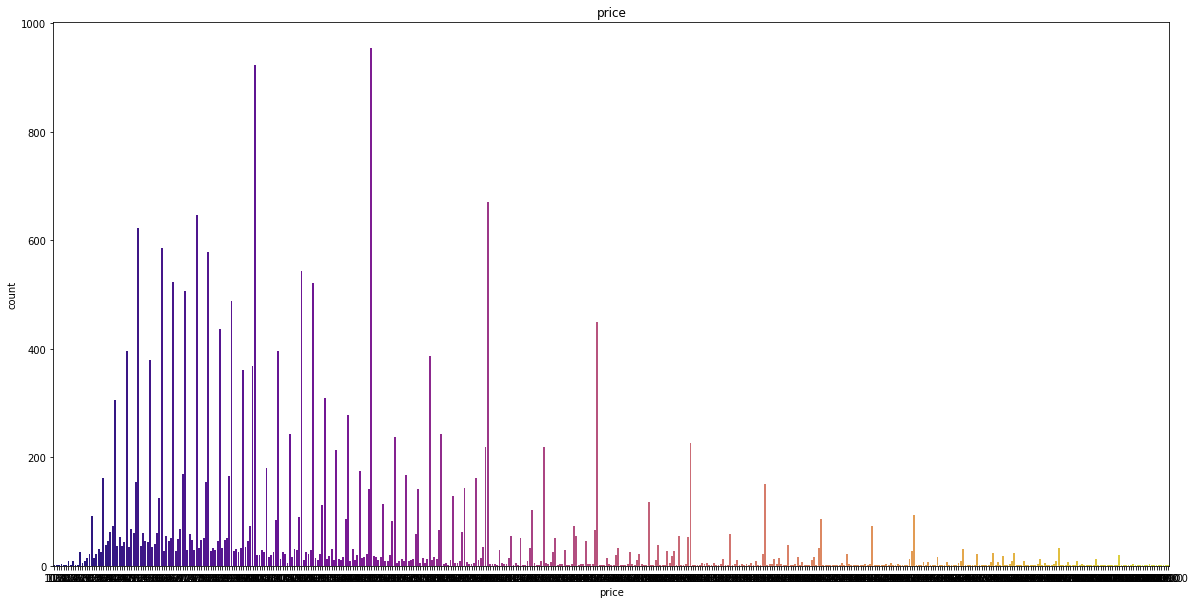

In [15]:
sns.countplot(data['price'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('price')

8. Check the Relation Between Neighborhod and Availability Room

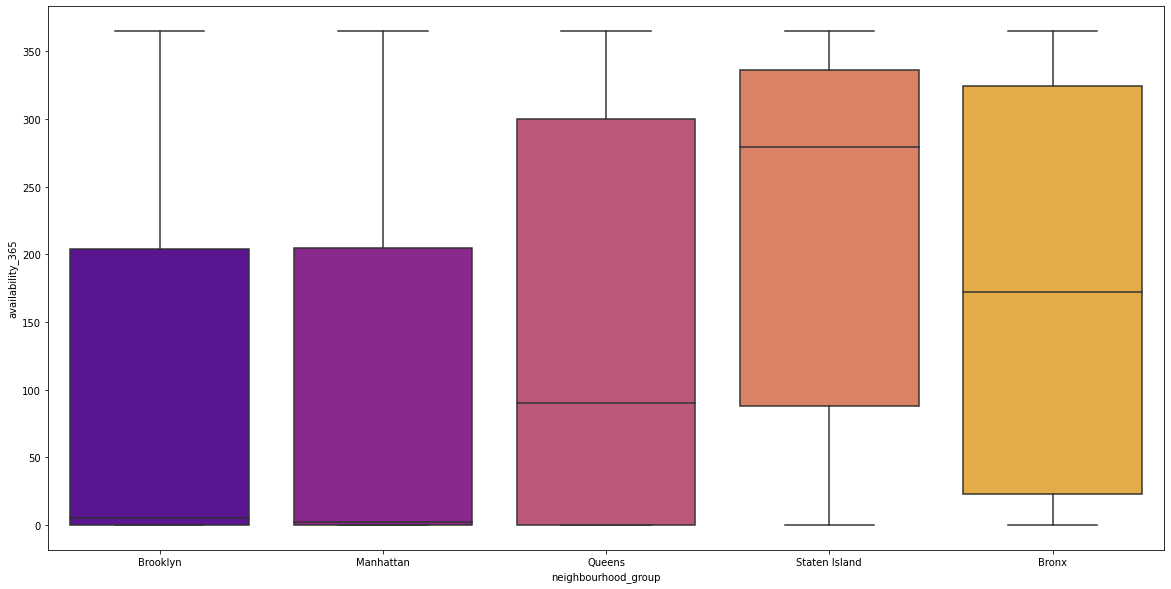

In [18]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

9. Map of Availabity Room

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


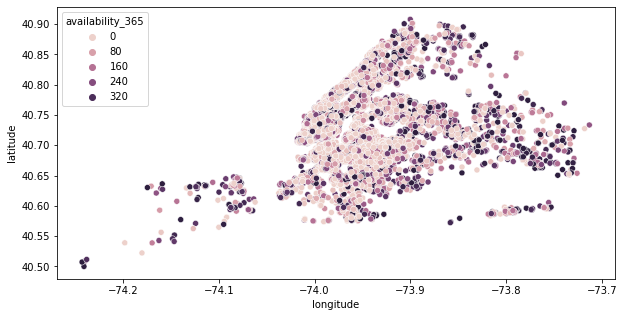

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.longitude,data.latitude, hue=data.availability_365)
plt.ioff()

In [24]:
data.values

array([[2539, 'Clean & quiet apt home by the park', 2787, ..., 0.21, 6.0,
        365.0],
       [2595, 'Skylit Midtown Castle', 2845, ..., 0.38, 2.0, 355.0],
       [3647, 'THE VILLAGE OF HARLEM....NEW YORK !', 4632, ..., nan, 1.0,
        365.0],
       ...,
       [17748284, 'Guest BedRm in quaint NYC neighborhood. NEAR TRAIN',
        25196982, ..., 3.24, 1.0, 9.0],
       [17749273, '1 br Woodside - close to LGA!', 121096858, ..., nan,
        1.0, 0.0],
       [17750238, 'Great room in a spacious Inwood Apartment', 13860679,
        ..., nan, nan, nan]], dtype=object)

10. Regression Analyst

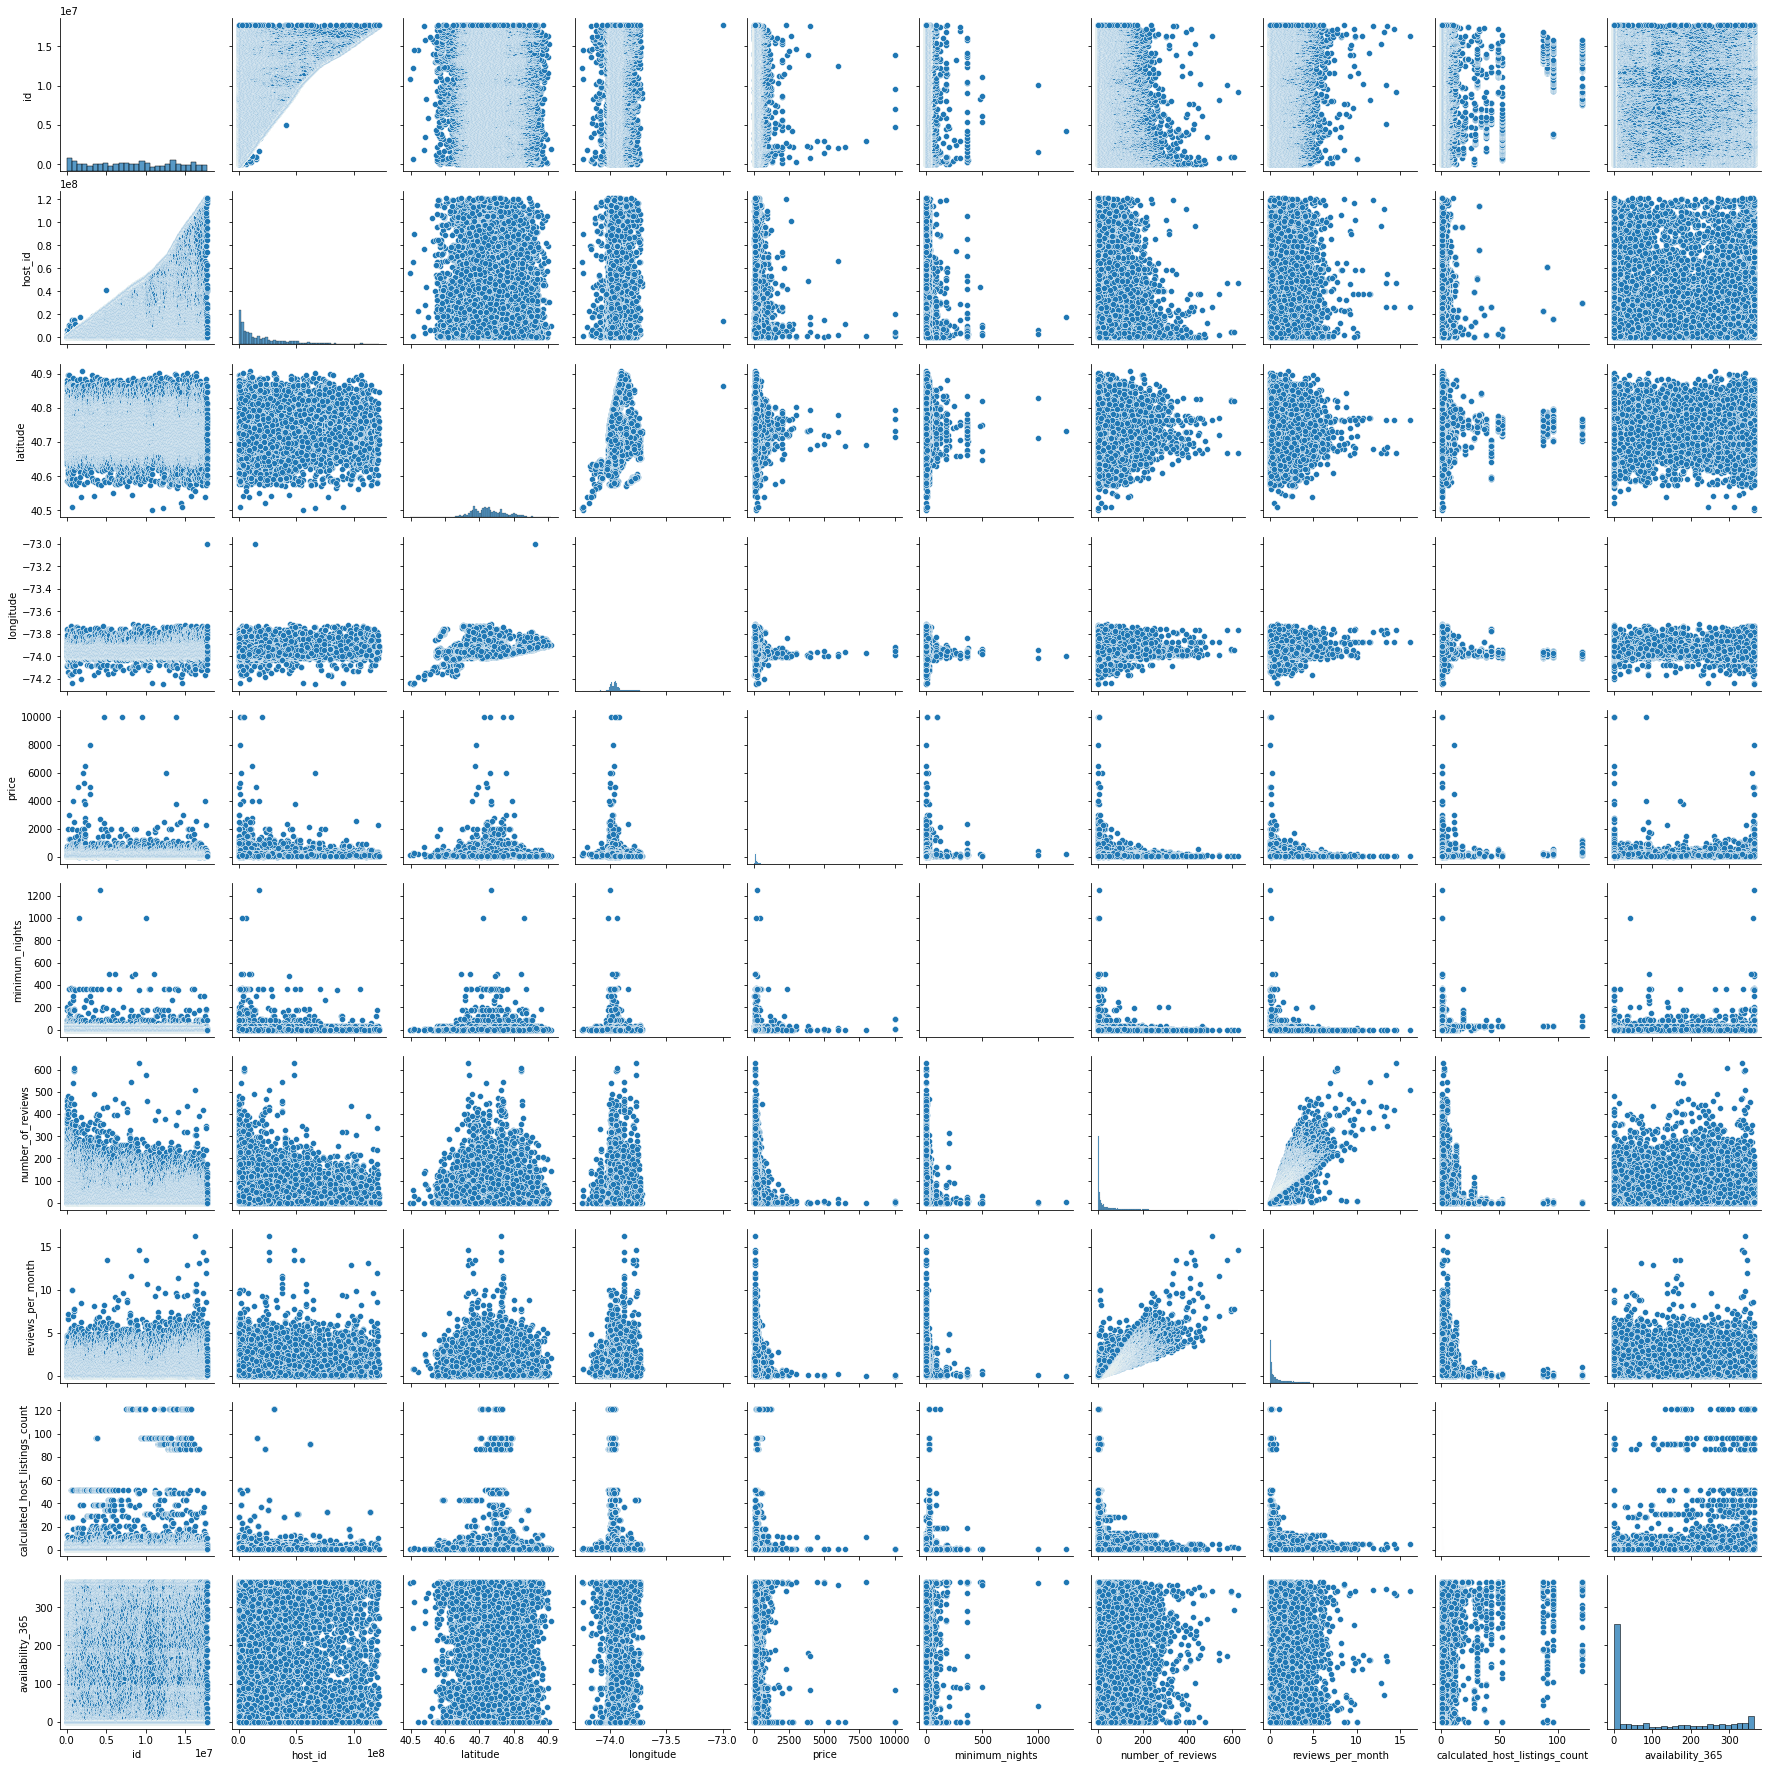

In [27]:
sns.pairplot(data)